<h2> Demo: Linear Programming using Pulp in Python </h2>

In this demo, you will learn how to perform Linear Programming using Pulp in Python.

# Problem Statement

A bakery bakes two types of cakes. Cake A requires <b>2 eggs</b> and <b>3 cups(cup measures 250gm) of flour</b> and cake B requires <b>4 eggs</b> and <b>2 cups of flour</b> respectively. Cake A sells for <b>₹45</b> and cake B sells for <b>₹30</b>. The bakery has a limited supply of <b>eggs</b> and <b>flour</b> which is <b>900 eggs</b> and <b>180.5 KG of flour</b>. How many cakes of each type should be baked to maximize profit?

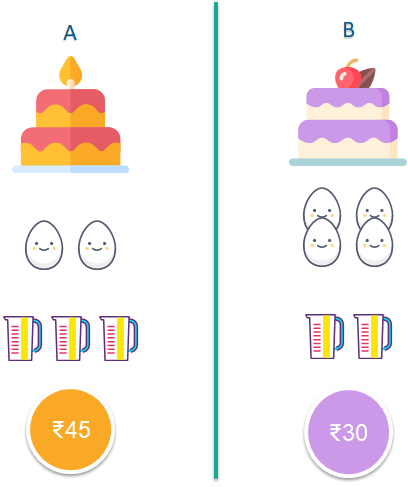

---

# Importing Libraries

In [1]:
import pulp as pl
import pandas as pd

## Linear Programming

### Select Variables

In [2]:
#Define Linear programming status here
max_profit = pl.LpProblem("Cake_Problem",pl.LpMaximize)

In [3]:
#Since, x = no of corn for acre and y = no of corn for sugarcane
CakeA = pl.LpVariable('CakeA', lowBound =0)
CakeB = pl.LpVariable('CakeB',lowBound =0)

### Objective Function

In [4]:
#Define maximum profit equation
max_profit += 45 * CakeA + 30 * CakeB

### List Constraints

In [5]:
#convering amount of flour into number of cups
ncups=(180.5*1000)/250
ncups

722.0

In [6]:
max_profit += 2*CakeA + 4*CakeB <= 900
max_profit += 3*CakeA + 2*CakeB <= ncups
#Naturally number of cakes cannot be negative
max_profit += CakeA >= 0
max_profit += CakeB >= 0

In [7]:
#Print LP function here
print(max_profit)

Cake_Problem:
MAXIMIZE
45*CakeA + 30*CakeB + 0
SUBJECT TO
_C1: 2 CakeA + 4 CakeB <= 900

_C2: 3 CakeA + 2 CakeB <= 722

_C3: CakeA >= 0

_C4: CakeB >= 0

VARIABLES
CakeA Continuous
CakeB Continuous



In [8]:
#analyze status of Linear programming problem
func_stat = max_profit.solve()
print("The status for this linear problem will be {}".format(pl.LpStatus[func_stat]))

The status for this linear problem will be Optimal


In [10]:
#Print all combination that satisfy constraints
print('CakeA',pl.value(CakeA),'\nCakeB',pl.value(CakeB),'\nMax_Profit',pl.value(max_profit.objective),sep=' ')

CakeA 136.0 
CakeB 157.0 
Max_Profit 10830.0


*__Conclusion__*: In this demonstration, we have learned how to use linear programing in python using pulp.